
# Financial Data Insights: Key Price Analysis and Ranking
* Assess and analyze the given market data from 2024-03-18 to 2024-06-14. Focus on the week of **May 27th** (2024-05-27 to 2024-05-31).
* Identify important time ranges and prices/price ranges in that week, explain their importance, and analyze these metrics.
* Explore possible causes, including major news occurrences, market impacts, etc.
* Create a module to find this price and create a ranking system to score the price importance.
* Deliver a clear and understandable project that impactfully conveys our findings.


## Table Schema

* **ts_event**: time in EST
* **open**: price at start of time interval
* **high**: max price during time interval
* **low**: min price during time interval
* **close**: last price of time interval
* **volume**: total volume traded (A + B + N)
* **volume_A**: total volume traded on A side
* **volume_B**: total volume traded on B side
* **volume_N**: total volume traded on N side


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all datasets
df_1D = pd.read_csv('1D.csv', parse_dates=['ts_event'])
df_60min = pd.read_csv('60min.csv', parse_dates=['ts_event'])
df_5min = pd.read_csv('5min.csv', parse_dates=['ts_event'])
df_1min = pd.read_csv('1min.csv', parse_dates=['ts_event'])
df_10s = pd.read_csv('10s.csv', parse_dates=['ts_event'])


# Analyzing Price Movements 
First, we'll take a look at the overall price trends for May 2024.<br>
 
This provides context for understanding how prices have fluctuated throughout the month and how the week of May 27-31 fits into the broader market movement. By plotting open, high, low, and close prices for the month, we get a clear view of where this week stands in relation to the month as a whole.

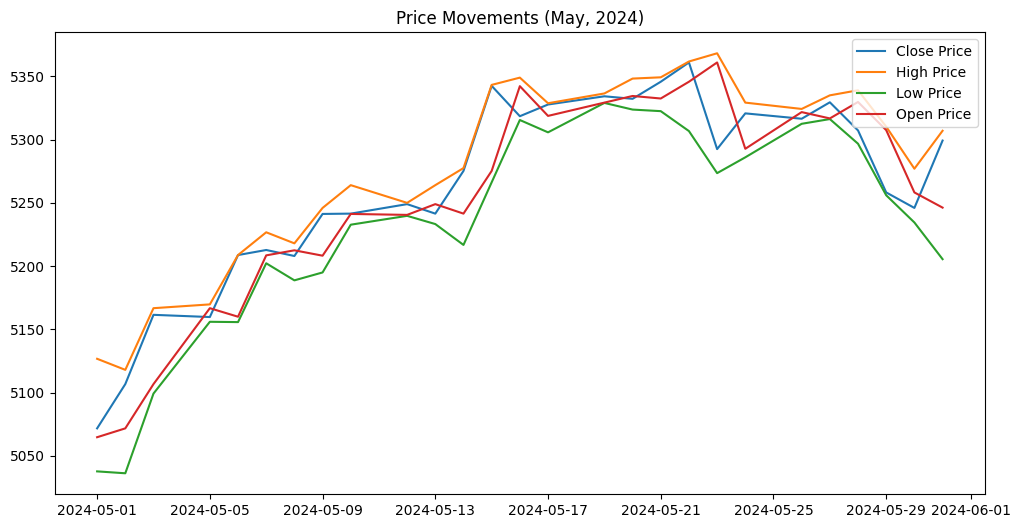

In [2]:
#Monthly Price Movements

#Let's analyze price movements in May 2024
month_data = df_1D[(df_1D['ts_event'] >= '2024-05-1') & (df_1D['ts_event'] <= '2024-05-31')]


# Plot the price data (open, high, low, close)
plt.figure(figsize=(12, 6))
plt.plot(month_data['ts_event'], month_data['close'], label='Close Price')
plt.plot(month_data['ts_event'], month_data['high'], label='High Price')
plt.plot(month_data['ts_event'], month_data['low'], label='Low Price')
plt.plot(month_data['ts_event'], month_data['open'], label='Open Price')
plt.legend(loc='upper right')
plt.title('Price Movements (May, 2024)')
plt.show()



We observe that the price movement generally showed a steady upward trend until around May 25, with prices rising consistently throughout the month. However, during the week of May 27-31, the market experienced a sharp reversal, with a noticeable downward movement in price.<br>

This week stands out as an anomaly compared to the broader bullish trend, characterized by a rapid decline in prices and increased volatility, particularly between May 29 and May 31.<br>

Let's zoom into our week of interest: May 27 - May 31 of 2024.

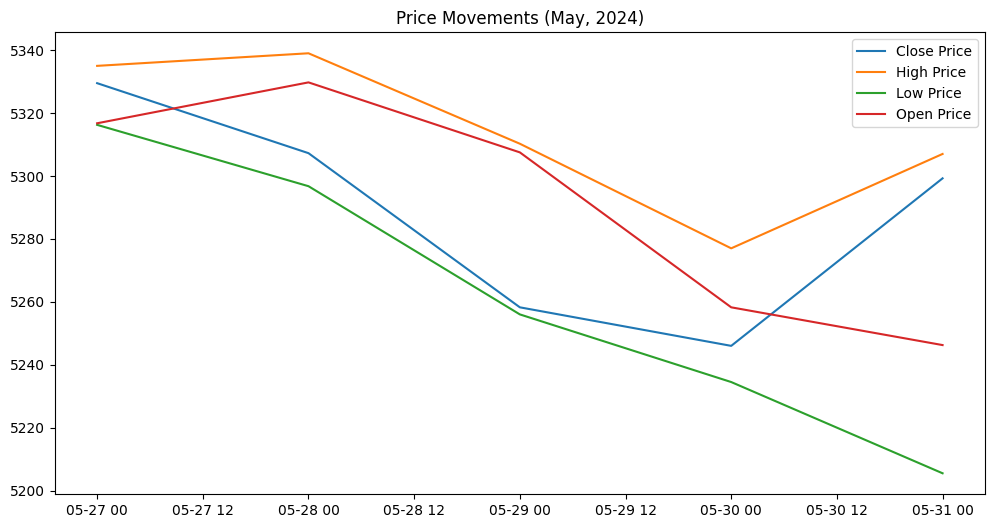

In [3]:

#We'll zoom into May 27 - May 31, 2024 and analyze the price movements in 1 day increments
df_1D_month_data = df_1D[(df_1D['ts_event'] >= '2024-05-27') & (df_1D['ts_event'] <= '2024-05-31')]

# Plot the price data (open, high, low, close)
plt.figure(figsize=(12, 6))
plt.plot(df_1D_month_data['ts_event'], df_1D_month_data['close'], label='Close Price')
plt.plot(df_1D_month_data['ts_event'], df_1D_month_data['high'], label='High Price')
plt.plot(df_1D_month_data['ts_event'], df_1D_month_data['low'], label='Low Price')
plt.plot(df_1D_month_data['ts_event'], df_1D_month_data['open'], label='Open Price')
plt.legend(loc='upper right')
plt.title('Price Movements (May, 2024)')
plt.show()



We see a gradual decline throughout the week, which becomes more pronounced on May 30. There is a significant drop in prices on this day. Interestingly, after reaching a minimum on May 30, both the close price and the high price attempt a small recovery toward the end of the week.

This period represents a potential point of interest, where the price trends show a possible reversal or temporary support level forming. We hae identified a possible important price/range of prices. Let's zoom in further to May 29 - May 31 and break down price changes hour by hour and then minute by minute to closely analyze these events.

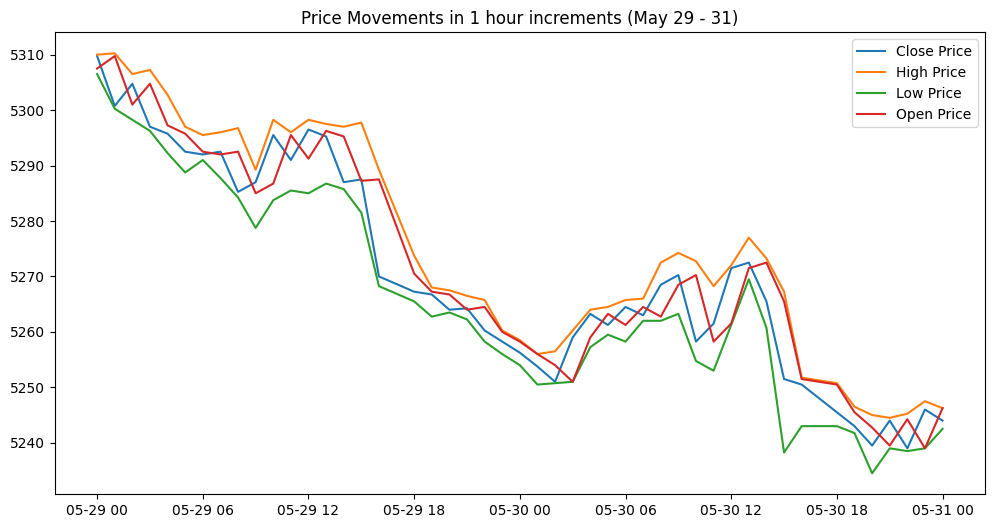

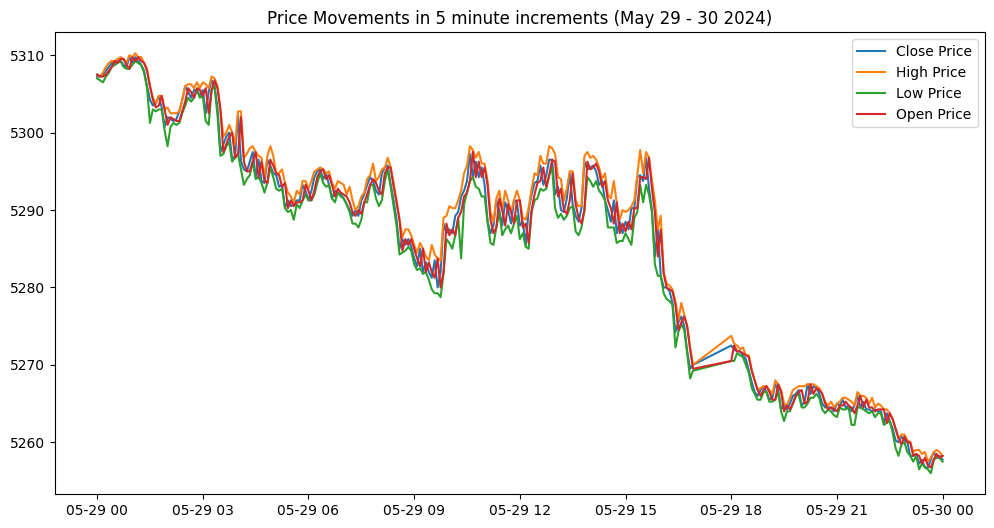

In [4]:
#Increment by the hour
#We'll zoom into May 29 - May 31, 2024 and analyze the price movements in 1 hour increments
df_60min_month_data = df_60min[(df_60min['ts_event'] >= '2024-05-29') & (df_60min['ts_event'] <= '2024-05-31')]

# Plot the price data (open, high, low, close)
plt.figure(figsize=(12, 6))
plt.plot(df_60min_month_data ['ts_event'], df_60min_month_data ['close'], label='Close Price')
plt.plot(df_60min_month_data ['ts_event'], df_60min_month_data ['high'], label='High Price')
plt.plot(df_60min_month_data ['ts_event'], df_60min_month_data ['low'], label='Low Price')
plt.plot(df_60min_month_data ['ts_event'], df_60min_month_data ['open'], label='Open Price')
plt.legend(loc='upper right')
plt.title('Price Movements in 1 hour increments (May 29 - 31)')
plt.show()


#Increment by 5 minutes
#We'll zoom in further into May 29 - May 30, 2024 and analyze the price movements in 5 minute increments
df_5min_month_data = df_5min[(df_5min['ts_event'] >= '2024-05-29') & (df_5min['ts_event'] <= '2024-05-30')]

plt.figure(figsize=(12, 6))
plt.plot(df_5min_month_data ['ts_event'], df_5min_month_data ['close'], label='Close Price')
plt.plot(df_5min_month_data ['ts_event'], df_5min_month_data ['high'], label='High Price')
plt.plot(df_5min_month_data ['ts_event'], df_5min_month_data ['low'], label='Low Price')
plt.plot(df_5min_month_data ['ts_event'], df_5min_month_data ['open'], label='Open Price')
plt.legend(loc='upper right')
plt.title('Price Movements in 5 minute increments (May 29 - 30 2024)')
plt.show()


### **A Closer Analysis:**<br>

#### Analysis of Price Movements in 1-Hour Increments (May 27–31, 2024)<br>
This graph highlights the price movements within 1-hour increments over the course of the week. From May 27 to May 29, prices experience gradual fluctuations, but the overall trend points downward. The sharpest price drop occurs on May 30, marking a significant point of market stress. This sharp decline signals increased volatility and a potential shift in market sentiment. Following this drop, there is some attempt at recovery, but the prices remain unstable, with significant fluctuations continuing through May 31.

#### Zooming into Price Movements for May 29-30<br>
In this zoomed-in view from May 29 to May 30, we can better observe the sudden decline that defines the critical event on May 30. The market maintains relative stability on May 29, but on May 30, prices plummet in the second half of the day. This sharp drop could indicate an external market event or shift in investor sentiment, triggering a large-scale sell-off. While the market makes some recovery attempts, particularly in the high and low prices, the broader downward trend dominates this period.


### **Economic Events Impact (May 30):**<br>
Now we want to understand, why this point of time (May 30) is important and what factors could have driven shifts in market sentiment during this period. By analyzing the economic calendar for the week of May 27-31 and reviewing articles on key events occurring on May 30, I gained some valuable insights.

One of the major events that occurred during this time was the Dow Jones Industrial Average dropping by about 330 points on May 30. This drop may have been connected to inflation concerns since inflation data came out earlier in the month, on May 15. Inflation reports usually affect market sentiment because they hint at possible changes in interest rates or monetary policy, which can impact how people trade and invest.

This drop likely reflects market uncertainty and caused a spike in volatility. But as we can see from the price movements, the market tries to correct itself, and prices recover after the dip. This suggests that despite the initial shock, investors expected things to stabilize as they processed the inflation news and its potential effects.


Key articles:<br>
[Wall Street Journal](https://www.wsj.com/livecoverage/stock-market-today-dow-jones-earnings-05-30-2024)<br>
[Yahoo Finance](https://finance.yahoo.com/news/stock-market-news-may-31-082200630.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABZiQvHCCl2oIpMIxic3NoOi0zKkaHSiHC74bTB4uxiLwAHxzdKJpr8TAsWrku5AqxNRnHQRN5yX2N4AP8q6hghrRxKblIG5JpaWsj6zyt52ymG-DmuZg5q-N52_l-xtb3RuLiq4KBx1oP45QJVrtPPlNIt8NipivDx8wKXYKsLk)

### Create a module to identify this important price.<br>

We will identify support and resistance levels, areas that indicate trend reversals or volatility. Specifically, a support level is a price point where a downward trending asset's price finds "support" as it falls, meaning that the price is likely to potentially rebound. A resistance level is the opposite of this. It is a price point where an upward-trending asset's price faces resistance as it rises. It acts as a "ceiling" where the price has trouble moving higher. 

In [5]:
#Find support and resistance levels

def find_support_resistance(prices, volume, tolerance=0.01):
    support_levels = []
    resistance_levels = []
    
    #iterate throguh the prices and search for minimums (supoort) and maximums (resistance)
    for i in range(1128, 1215):
        if prices[i] < prices[i-1] and prices[i] < prices[i+1]:
            support_levels.append((prices[i], volume[i]))
        if prices[i] > prices[i-1] and prices[i] > prices[i+1]:
            resistance_levels.append((prices[i], volume[i]))

    # Cluster similar support and resistance levels
    support = cluster_levels(support_levels, tolerance)
    resistance = cluster_levels(resistance_levels, tolerance)
    
    return support, resistance

# Helper function to cluster similar price levels within a tolerance
# A tolerance value allows us to group similar price levels together within that tolerance range
def cluster_levels(levels, tolerance):
    clustered_levels = []
    #case where we have no support or resistance levels
    if len(levels) == 0:
        return clustered_levels

    sorted_levels = sorted(levels, key=lambda x: x[0])  #sort the levels by price
    
    # Group levels that are within the tolerance range
    cluster = [sorted_levels[0]]
    for i in range(1, len(sorted_levels)):
        if abs(sorted_levels[i][0] - cluster[-1][0]) <= tolerance:
            cluster.append(sorted_levels[i])
        else:
            # Calculate the average price and volume for the cluster if we are outside the tolerance range
            avg_price = np.mean([level[0] for level in cluster])
            avg_volume = np.mean([level[1] for level in cluster])
            clustered_levels.append((avg_price, avg_volume))
            cluster = [sorted_levels[i]]
    
    # Add the last cluster
    avg_price = np.mean([level[0] for level in cluster])
    avg_volume = np.mean([level[1] for level in cluster])
    clustered_levels.append((avg_price, avg_volume))
    
    return clustered_levels

price_tolerance = 0.01

# Find support and resistance levels for the hourly data
hourly_data = df_60min[(df_60min['ts_event'] >= '2024-05-27') & (df_60min['ts_event'] <= '2024-05-31')]
support, resistance = find_support_resistance(hourly_data['close'], hourly_data['volume'], tolerance=price_tolerance)

print("Support Levels (Price, Volume):", support)
print("Resistance Levels (Price, Volume):", resistance)


Support Levels (Price, Volume): [(5239.0, 5865.0), (5239.5, 12715.0), (5251.0, 11146.0), (5258.25, 246031.0), (5261.25, 10111.0), (5263.0, 17051.0), (5264.0, 9973.0), (5285.25, 37069.0), (5287.0, 101645.0), (5291.0, 127331.0), (5292.0, 12209.0), (5300.75, 8309.0), (5307.25, 6127.0), (5309.0, 194222.0), (5318.5, 5147.0), (5319.25, 3049.0), (5319.75, 160355.0), (5324.5, 5794.0), (5327.25, 18336.0), (5328.0, 2317.0), (5328.75, 12402.0)]
Resistance Levels (Price, Volume): [(5244.0, 9709.0), (5246.0, 6938.0), (5263.25, 17035.0), (5264.25, 9111.0), (5264.5, 13035.0), (5270.25, 174875.0), (5272.5, 83824.0), (5287.5, 224229.0), (5292.5, 21246.0), (5295.5, 223439.0), (5296.5, 101451.0), (5304.75, 11559.0), (5309.75, 3775.0), (5321.0, 1990.0), (5322.5, 3929.0), (5325.5, 232312.0), (5326.5, 93177.0), (5329.0, 22761.0), (5329.5, 3054.0), (5331.0, 6341.0), (5334.0, 7477.0), (5337.75, 20422.0)]


#### Ranking System

We will create a ranking system to evaluate support and resistance levels by considering how close they are to the current price and how much volume was traded at each level. The closer a price level is to the current price, the higher its importance, and if there's more volume traded at that level, it gets an even higher rank. This way, the system identifies the most important price levels that are likely to impact future price movements. The result is a ranked list of key support and resistance levels, which helps pinpoint the most significant price points in the market.

In [6]:
#Ranking system

hourly_data = df_60min[(df_60min['ts_event'] >= '2024-05-27') & (df_60min['ts_event'] <= '2024-05-31')]

# Function to rank price importance
def rank_price_levels(support, resistance, current_price, weight_volume=True):
    support_ranks = []
    resistance_ranks = []
    
    # Rank support levels
    for price, volume in support:
        proximity = abs(price - current_price)  # How close is it to the current price
        score = 1 / (proximity + 0.01)  # Lower proximity gets higher score
        
        if weight_volume:
            score *= volume  # Multiply by volume to give higher importance to levels with high volume
        
        support_ranks.append((price, score))
    
    # Rank resistance levels
    for price, volume in resistance:
        proximity = abs(price - current_price)
        score = 1 / (proximity + 0.01)
        
        if weight_volume:
            score *= volume
        
        resistance_ranks.append((price, score))
    
    # Sort by the score
    support_ranks = sorted(support_ranks, key=lambda x: x[1], reverse=True)
    resistance_ranks = sorted(resistance_ranks, key=lambda x: x[1], reverse=True)
    
    return support_ranks, resistance_ranks

# Example usage: Let's assume the current price is the latest close price
current_price = hourly_data['close'].iloc[-1]
support_ranks, resistance_ranks = rank_price_levels(support, resistance, current_price)



### Visualize the support and resistance levels

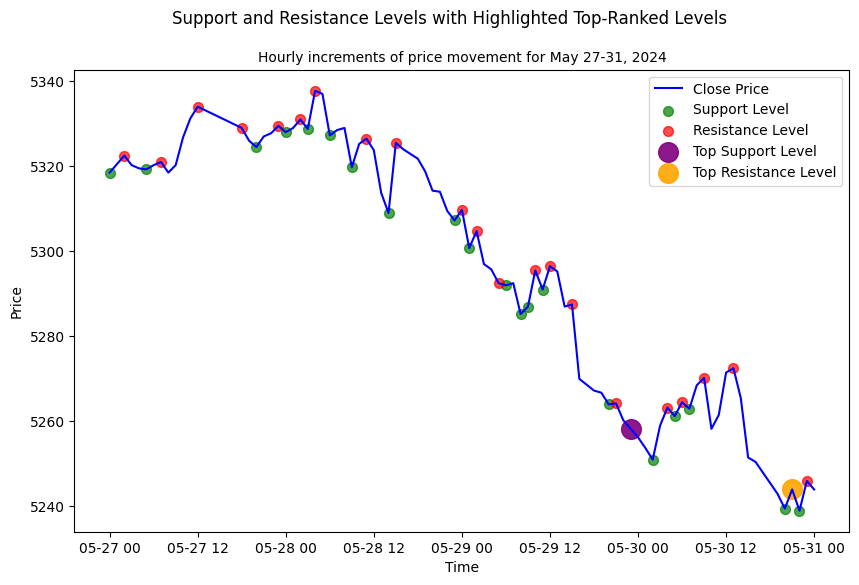

Top 10 Ranked Support Levels (Price, Score):

First Ranked:
Price: 5258.25, Score: 17253.23

Price: 5309.00, Score: 2987.57
Price: 5239.50, Score: 2819.29
Price: 5291.00, Score: 2708.59
Price: 5287.00, Score: 2363.29
Price: 5319.75, Score: 2116.62
Price: 5251.00, Score: 1590.01
Price: 5239.00, Score: 1170.66
Price: 5285.25, Score: 898.42
Price: 5263.00, Score: 896.95

Top 10 Ranked Resistance Levels (Price, Score):

First Ranked:
Price: 5244.00, Score: 970900.00

Price: 5270.25, Score: 6659.37
Price: 5287.50, Score: 5153.50
Price: 5295.50, Score: 4337.78
Price: 5246.00, Score: 3451.74
Price: 5272.50, Score: 2940.16
Price: 5325.50, Score: 2850.10
Price: 5296.50, Score: 1932.03
Price: 5326.50, Score: 1129.28
Price: 5263.25, Score: 884.48


In [7]:
#Visualize the support and resistance levels

scale_factor = 5
max_size = 50

# Visualization: Support and Resistance levels with emphasis on the top-ranked ones
plt.figure(figsize=(10, 6))

# Plot the close price
plt.plot(hourly_data['ts_event'], hourly_data['close'], label='Close Price', color='blue')

# Scatter plot for normal support and resistance levels without duplicating the legend
plt.scatter([], [], label='Support Level', color='green', s=50, alpha=0.7)  # For legend only
plt.scatter([], [], label='Resistance Level', color='red', s=50, alpha=0.7)  # For legend only

# Scatter plot for ranked support levels
for price, score in support_ranks[1:]:  # Skip the top-ranked for later
    ts_event = hourly_data['ts_event'][hourly_data['close'].sub(price).abs().idxmin()]  # Find the closest ts_event for the price
    point_size = min(score * scale_factor, max_size)  # Scale the size and cap it
    plt.scatter(ts_event, price, s=point_size, color='green', alpha=0.7)

# Scatter plot for ranked resistance levels
for price, score in resistance_ranks[1:]:  # Skip the top-ranked for later
    ts_event = hourly_data['ts_event'][hourly_data['close'].sub(price).abs().idxmin()]  # Find the closest ts_event for the price
    point_size = min(score * scale_factor, max_size)  # Scale the size and cap it
    plt.scatter(ts_event, price, s=point_size, color='red', alpha=0.7)

# Highlight the top-ranked support and resistance levels with special colors and sizes
top_support_price, top_support_score = support_ranks[0]
top_support_ts = hourly_data['ts_event'][hourly_data['close'].sub(top_support_price).abs().idxmin()]
plt.scatter(top_support_ts, top_support_price, s=200, color='purple', label='Top Support Level', alpha=0.9)

top_resistance_price, top_resistance_score = resistance_ranks[0]
top_resistance_ts = hourly_data['ts_event'][hourly_data['close'].sub(top_resistance_price).abs().idxmin()]
plt.scatter(top_resistance_ts, top_resistance_price, s=200, color='orange', label='Top Resistance Level', alpha=0.9)

# Add labels, title, and a single legend
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Hourly increments of price movement for May 27-31, 2024', fontsize=10)
plt.suptitle('Support and Resistance Levels with Highlighted Top-Ranked Levels', fontsize=12)
plt.legend(loc='best')
plt.show()

print("Top 10 Ranked Support Levels (Price, Score):\n")
print("First Ranked:")
print(f"Price: {support_ranks[0][0]:.2f}, Score: {support_ranks[0][1]:.2f}\n")
for level in support_ranks[1:10]:
    print(f"Price: {level[0]:.2f}, Score: {level[1]:.2f}")

print("\nTop 10 Ranked Resistance Levels (Price, Score):\n")
print("First Ranked:")
print(f"Price: {resistance_ranks[0][0]:.2f}, Score: {resistance_ranks[0][1]:.2f}\n")
for level in resistance_ranks[1:10]:
    print(f"Price: {level[0]:.2f}, Score: {level[1]:.2f}")


### Finally... support our findings by analyzing volumes
The following bar plot showcases Total Volume, Volume A (buyers), Volume B (sellers), and Volume N (neutral trades) over the week of May 27-31, 2024, and provides valuable insights into market behavior during key price movements.

Notably, the volume spikes on May 28 and May 30 coincide with critical support and resistance levels identified in the price analysis. The spike in Volume A (buyers) during these times suggests increased market interest and an attempt by buyers to push the price higher. However, resistance was met with strong selling pressure, leading to price pullbacks. This pattern confirms the importance of these levels as areas of high market activity and potential turning points.

Additionally, the dominance of Volume A near resistance levels and the overall increase in total volume during these periods provide further evidence that these levels are key decision points for market participants. The high volume validates that these levels attract strong participation and could serve as future benchmarks for price movements.


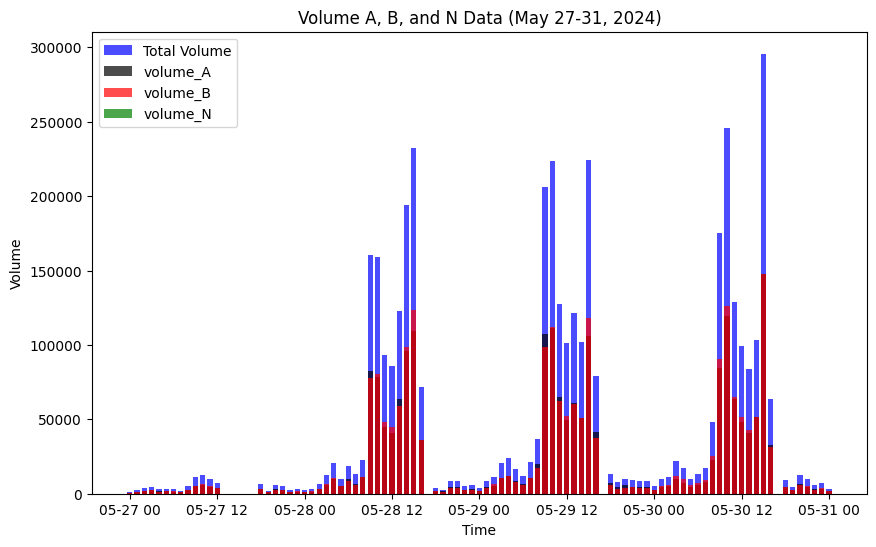

In [8]:

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot bar charts for each type of volume
plt.bar(hourly_data['ts_event'], hourly_data['volume'], width=0.03, label='Total Volume', color='blue', alpha=0.7)
plt.bar(hourly_data['ts_event'], hourly_data['volume_A'], width=0.03, label='volume_A', color='black', alpha=0.7)
plt.bar(hourly_data['ts_event'], hourly_data['volume_B'], width=0.03, label='volume_B', color='red', alpha=0.7)
plt.bar(hourly_data['ts_event'], hourly_data['volume_N'], width=0.03, label='volume_N', color='green', alpha=0.7)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume A, B, and N Data (May 27-31, 2024)')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Summary
This was a really interesting project to complete! I started off by understanding the data that I was provided. I looked at the different fields, looked into Volume Data, market patterns, bullish/bearish trends, support and resistance levels, and more. I examined the various csv files and thought about if and how I would use the extensive data available--from daily, hourly, and minutes and seconds increments. Overall, I understood what the goal of the project was clearly before I started working my way through it.

Since the prompt focused on analyzing price, I decided to plot the different trends in price first. First, I looked at the 1D data. Then, I realized that I wanted a broader picture in relation to the week we were focusing on, so I plotted the data for May. I noticed some declining trends during the week in question and zoomed in on an hourly and then by the minute (5 minutes) basis. I found interesting fluctuations and looked into market trends that might cause said fluctuations in the data. I found that the Dow Jones Industrial Average fell on that date, which could account for the sudden decline. 

After focusing on this range, I looked at important prices by creating functions to find support and resistance levels (local minima and maxima). I also created a ranking system to rank the support and resistance levels based on price proximity to the current price as well as the amount of volume traded at each level. I plotted my findings onto a graph for better visual analysis.

Lastly, I looked at the volume data to determine how they impacted the support and resistance levels during this period. I learned a lot from this project, and I realize that I still have more to learn! 
